In [1]:
import os
import sonia
from sonia.sonia_leftpos_rightpos import SoniaLeftposRightpos
from sonia.plotting import Plotter
from sonia.evaluate_model import EvaluateModel
from sonia.sequence_generation import SequenceGeneration
import numpy as np
import pandas as pd

# load lists of sequences with gene specification

In [2]:
# this assume data sequences are in semi-colon separated text file, with gene specification
data_seqs = pd.read_csv('data_seqs.csv.gz').values.astype(np.str)
data_seqs[:3]

array([['CASSKQGASEAFF', 'TRBV7-8', 'TRBJ1-1'],
       ['CASSPPPNYGYTF', 'TRBV6-1', 'TRBJ1-2'],
       ['CASSTDTTEAFF', 'TRBV6-5', 'TRBJ1-1']], dtype='<U26')

# define and infer model

In [3]:
qm = SoniaLeftposRightpos(data_seqs=data_seqs,chain_type='humanTRB')

  0%|          | 531/200000 [00:00<00:37, 5305.75it/s]

Encode data.


100%|██████████| 200000/200000 [00:36<00:00, 5462.77it/s]


In [4]:
# add generated sequences (you can add them from file too, more is better.)
qm.add_generated_seqs(int(2e5)) 

  1%|          | 1025/200000 [00:00<00:19, 10247.64it/s]

Encode gen.


100%|██████████| 200000/200000 [00:41<00:00, 4852.80it/s]


In [5]:
#define and train model
qm.infer_selection(epochs=10)

# do some plotting

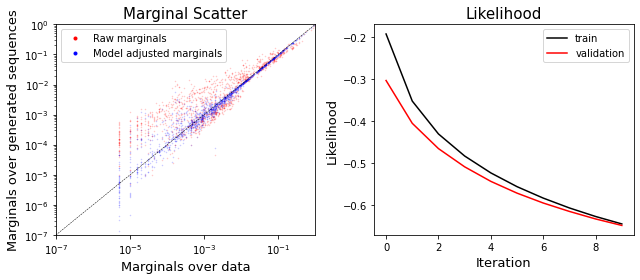

In [6]:
plot_sonia=Plotter(qm)
plot_sonia.plot_model_learning()

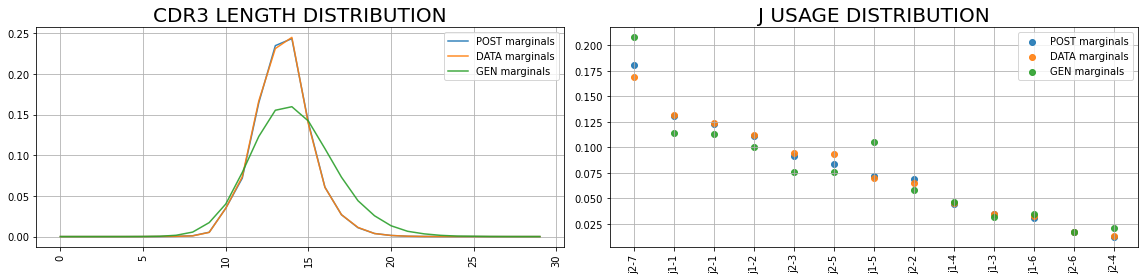

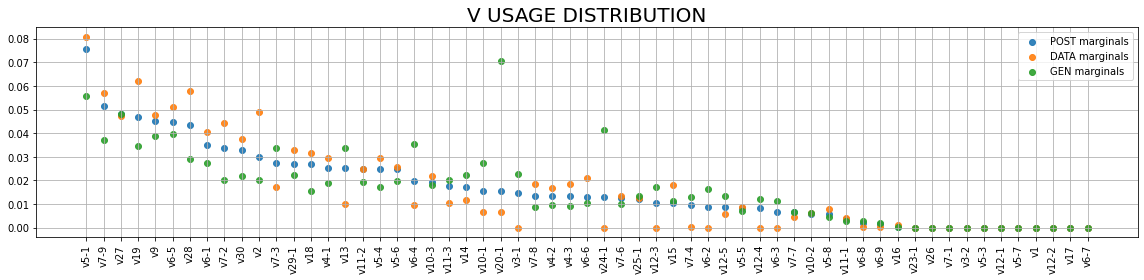

In [7]:
plot_sonia.plot_vjl()

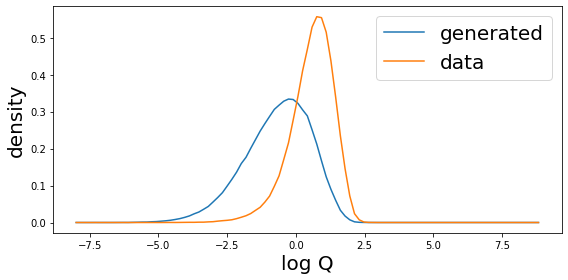

In [8]:
plot_sonia.plot_logQ()

# Generate sequences

In [9]:
pre_seqs=qm.generate_sequences_pre(int(1e4))
pre_seqs[:3]

array([['CASRRTGLIYEQYF', 'TRBV6-2', 'TRBJ2-7',
        'TGTGCCAGCAGGCGGACAGGTTTAATCTACGAGCAGTACTTC'],
       ['CASTDLTTYEQYF', 'TRBV28', 'TRBJ2-7',
        'TGTGCCAGCACAGACTTAACGACCTACGAGCAGTACTTC'],
       ['CASSVSRRFLTNEKLFF', 'TRBV7-9', 'TRBJ1-4',
        'TGTGCCAGCAGCGTTTCCCGGAGGTTTCTTACTAATGAAAAACTGTTTTTT']],
      dtype='<U81')

In [10]:
post_seqs=qm.generate_sequences_post(int(1e4))
post_seqs[:3]

array([['CASSYEEVGLTEAFF', 'TRBV7-3', 'TRBJ1-1',
        'TGTGCCAGCAGCTACGAGGAAGTCGGCCTGACTGAAGCTTTCTTT'],
       ['CASSLWGTVSYEQYF', 'TRBV12-4', 'TRBJ2-7',
        'TGTGCCAGCAGTTTATGGGGTACTGTCTCCTACGAGCAGTACTTC'],
       ['CASSYWTSGSDTQYF', 'TRBV6-5', 'TRBJ2-3',
        'TGTGCCAGCAGTTACTGGACTAGCGGGTCAGATACGCAGTATTTT']], dtype='<U90')

# Evaluate sequences

In [11]:
Q_data,pgen_data,ppost_data=qm.evaluate_seqs(qm.data_seqs[:int(1e4)])
Q_gen,pgen_gen,ppost_gen=qm.evaluate_seqs(pre_seqs)
Q_model,pgen_model,ppost_model=qm.evaluate_seqs(post_seqs)
print(Q_model[:3]),
print(pgen_model[:3])
print(ppost_model[:3])

[0.90070355 1.5411541  2.8676722 ]
[9.93172708e-13 5.08331561e-10 4.98619191e-09]
[8.94554183e-13 7.83417293e-10 1.42987639e-08]


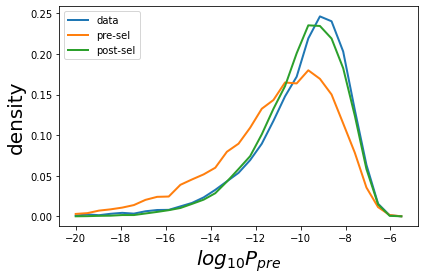

In [12]:
plot_sonia.plot_prob(data=pgen_data,gen=pgen_gen,model=pgen_model,ptype='P_{pre}')

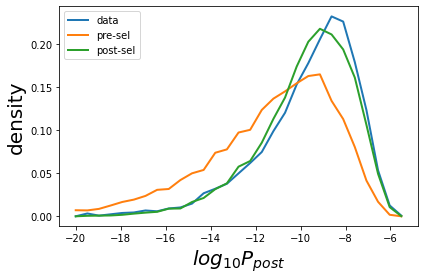

In [13]:
plot_sonia.plot_prob(ppost_data,ppost_gen,ppost_model,ptype='P_{post}')

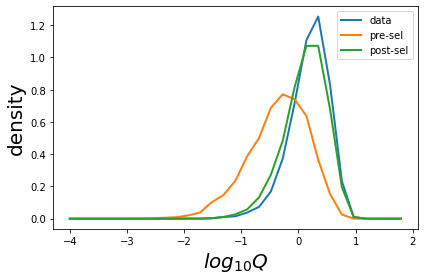

In [14]:
plot_sonia.plot_prob(Q_data,Q_gen,Q_model,ptype='Q',bin_min=-4,bin_max=2)

# some utils from OLGA

In [15]:
# evaluation and selection models import olga classes, that can be used for additional analyses.

In [17]:
qm.seqgen_model.gen_rnd_prod_CDR3()

('TGTGCCAGTGGAGGTAGGGTTCAGCCCCAGCATTTT',
 'CASGGRVQPQHF',
 'TRBV19*01',
 'TRBJ1-5*01')

In [18]:
qm.genomic_data.genJ[1]

['TRBJ1-2*01',
 'CTAACTATGGCTACACCTTC',
 'CTAACTATGGCTACACCTTCGGTTCGGGGACCAGGTTAACCGTTGTAG']

In [19]:
qm.pgen_model.PinsDJ

array([6.17437e-02, 3.61889e-02, 9.09608e-02, 1.05828e-01, 1.37586e-01,
       1.14643e-01, 9.60481e-02, 8.14864e-02, 6.38634e-02, 4.92164e-02,
       3.93751e-02, 2.90524e-02, 2.30059e-02, 1.64381e-02, 1.45157e-02,
       1.13759e-02, 5.79127e-03, 5.97164e-03, 3.92779e-03, 2.96191e-03,
       2.04381e-03, 2.48417e-03, 9.09996e-04, 1.35102e-03, 2.44798e-04,
       4.52171e-04, 9.17052e-04, 6.28282e-04, 0.00000e+00, 1.41295e-05,
       9.74155e-04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])

# load default sonia models

In [20]:
# load default model (human TRA)
model_dir=os.path.join(os.path.dirname(sonia.sonia_leftpos_rightpos.__file__),'default_models','human_T_alpha')
qm=SoniaLeftposRightpos(load_dir=model_dir,chain_type='human_T_alpha')

Cannot find data_seqs.tsv  --  no data seqs loaded.
Cannot find gen_seqs.tsv  --  no generated seqs loaded.


In [21]:
# generate seqs pre
seqs=qm.generate_sequences_pre(10)
# generate seqs post
seqs = qm.generate_sequences_post(10)
print(seqs)

[['CAAPTQSSASKIIF' 'TRAV8-6' 'TRAJ3'
  'TGTGCTGCTCCCACTCAAAGCAGTGCTTCCAAGATAATCTTT']
 ['CAAKRNTGGFKTIF' 'TRAV29/DV5' 'TRAJ9'
  'TGTGCAGCAAAGCGAAATACTGGAGGCTTCAAAACTATCTTT']
 ['CAVKNTPGTGGFKTIF' 'TRAV12-2' 'TRAJ9'
  'TGTGCCGTGAAGAACACACCAGGTACTGGAGGCTTCAAAACTATCTTT']
 ['CAVQAGDDKIIF' 'TRAV20' 'TRAJ30' 'TGTGCTGTGCAGGCGGGAGATGACAAGATCATCTTT']
 ['CGTYRDDKIIF' 'TRAV30' 'TRAJ30' 'TGCGGCACCTACAGAGATGACAAGATCATCTTT']
 ['CAEKGRGYGQNFVF' 'TRAV13-2' 'TRAJ26'
  'TGTGCAGAGAAGGGCCGTGGCTATGGTCAGAATTTTGTCTTT']
 ['CAAKGNTGGFKTIF' 'TRAV13-1' 'TRAJ9'
  'TGTGCAGCAAAGGGAAATACTGGAGGCTTCAAAACTATCTTT']
 ['CAPPLQGGSEKLVF' 'TRAV36/DV7' 'TRAJ57'
  'TGTGCCCCCCCGCTTCAGGGCGGATCTGAAAAGCTGGTCTTT']
 ['CAASMETEANFNKFYF' 'TRAV23/DV6' 'TRAJ21'
  'TGTGCAGCAAGCATGGAGACCGAAGCGAACTTCAACAAATTTTACTTT']
 ['CAASVGSRQLTF' 'TRAV23/DV6' 'TRAJ22'
  'TGTGCAGCAAGCGTAGGCTCAAGGCAACTGACCTTT']]
